# Topic: H.A.R.N.
## Scope: Agriculture
### Project Team: Maitri, Faryar and Mrunali


# A. Image Analysis & Preprocessing

##  Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import cv2
import os
import shutil

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization, RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
%matplotlib inline


## Load Dataset

### Path Configuration

In [2]:
healthy_dir ='../input/harn-rice-ds/HARN RICE DS/Healthy'
n_def_dir = '../input/harn-rice-ds/HARN RICE DS/N_Deficiency'
p_def_dir = '../input/harn-rice-ds/HARN RICE DS/P_Deficiency'
k_def_dir = '../input/harn-rice-ds/HARN RICE DS/K_Deficiency'
dataset_dir = '../input/harn-rice-ds/HARN RICE DS'

In [3]:
def load_random_imgs_from_folder(folder):
  plt.figure(figsize=(20,20))
  for i in range(5):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.xlabel(f'Image Shape: {img.shape}')
    plt.imshow(img)

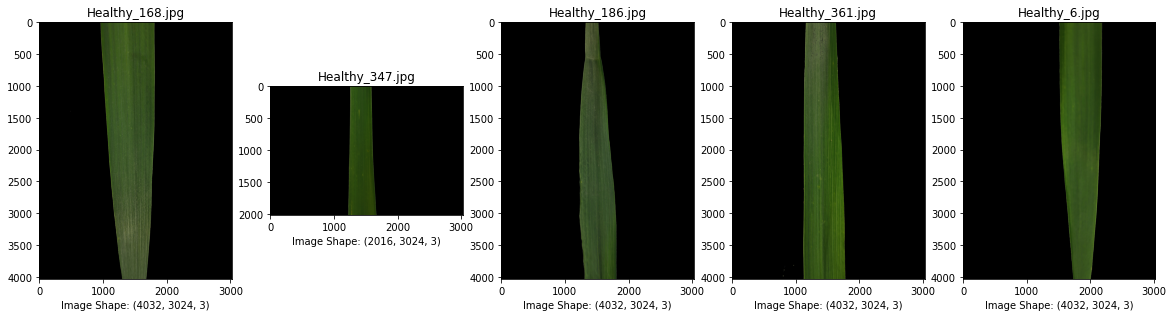

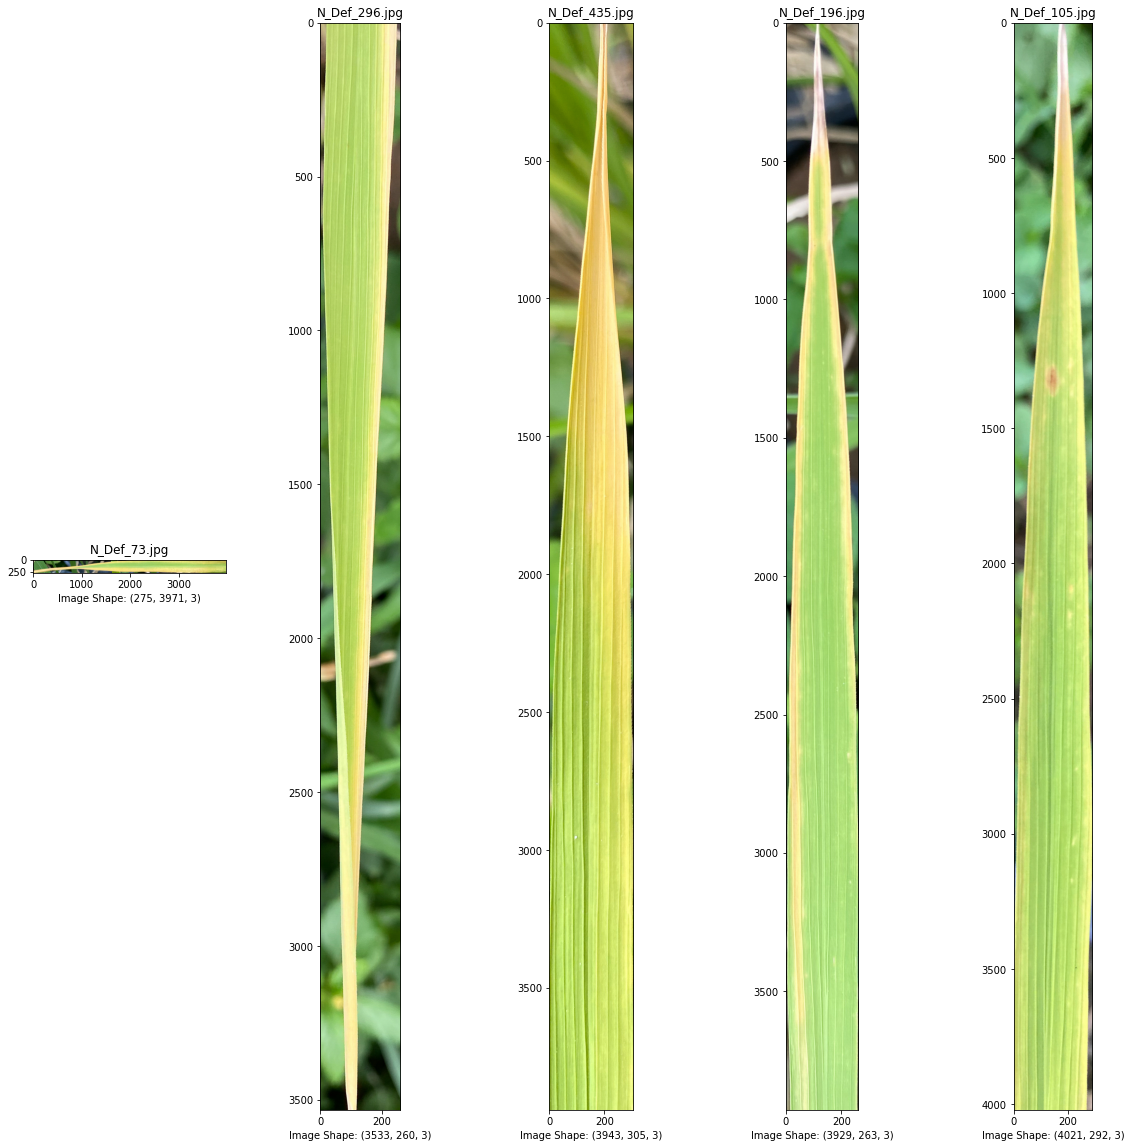

In [4]:
load_random_imgs_from_folder(healthy_dir)
print('\n\n')
load_random_imgs_from_folder(n_def_dir)

## Renaming the file names

In [5]:
# def rename_imgs(category, path):
#   # print(os.getcwd())
#   os.chdir(path)
#   print(os.getcwd())
#   for index, filename in enumerate(os.listdir(".")):
#     # print(filename, index)
#     os.rename(filename, f'{category}_{index+1}.jpg')
#     # print(filename)

In [6]:
# rename_imgs('Healthy', healthy_dir)
# rename_imgs('N_Def', n_def_dir)
# rename_imgs('P_Def', p_def_dir)
# rename_imgs('K_Def', k_def_dir)

## Create a dataframe


In [7]:
labels=[]
for i in os.listdir(dataset_dir):
  labels+=[i]

print(labels)

['P_Deficiency', 'Healthy', 'N_Deficiency', 'K_Deficiency']


In [8]:
IMG_SIZE = 224

In [9]:
# img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
              if img[-3:] != 'txt':
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
  

In [10]:
dataset = get_data(dataset_dir)
np.random.shuffle(dataset)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [11]:
len(dataset)

1530

In [12]:
train = dataset[:1070]
val = dataset[1070:1300]
test = dataset[1300:]

In [13]:
# train = dataset[:1021]
# val = dataset[1021:1192]
# test = dataset[1192:]

In [14]:
train_df = pd.DataFrame(train,columns=['Feature','Label'])

In [15]:
# train_df.head(5)

In [16]:
l=[]
for i in train_df['Label']:
  l.append(labels[i])

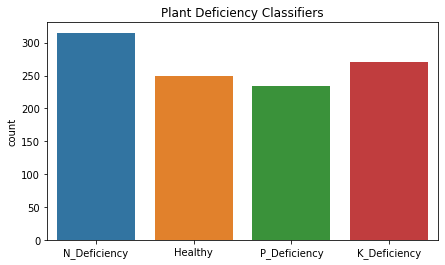

In [17]:
plt.figure(figsize=(7,4))
sns.countplot(x=l);
plt.title('Plant Deficiency Classifiers');

## Splitting the dataset

In [18]:
# X, test_img, Y, test_labels = train_test_split(df['Images'], df['Label'], test_size=0.2, shuffle = True, random_state = 2)

In [19]:
# x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 2)

In [20]:
# # checking the balance of classifiers in the y_train
# print(y_train.value_counts())
# plt.figure(figsize=(7,4))
# sns.countplot(y_train);
# plt.title('Malaria Classifiers');

In [21]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

# Image Preprocessing

## Normalizing the dataset

In [22]:
np.array(x_train).max()

255

Text(0.5, 1.0, 'P_Deficiency')

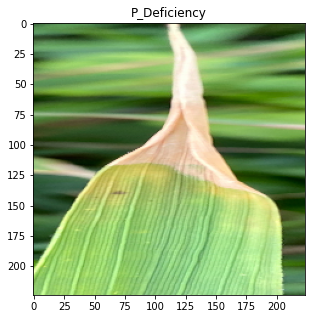

In [23]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [24]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)


In [25]:
x_test = np.array(x_test) / 255.0
y_test = np.array(y_test)

In [26]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((1070, 224, 224, 3),
 (1070,),
 (230, 224, 224, 3),
 (230,),
 (230, 224, 224, 3),
 (230,))

In [27]:
type(y_train[0])

numpy.int64

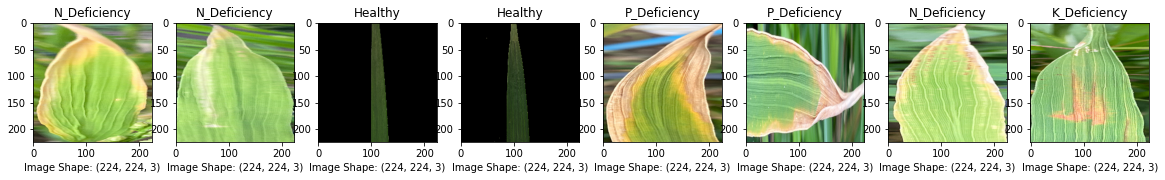

In [28]:
plt.figure(figsize=(20,20))

for i in range(8):
  img = x_train[i]
  ax=plt.subplot(1,8,i+1)
  ax.title.set_text(labels[y_train[i]])
  plt.xlabel(f'Image Shape: {img.shape}')
  plt.imshow(img)


## Image Preprocessing

In [29]:
def plot_before_after(img, filtered_img):
  plt.figure(figsize=(10,10))
  plt.subplot(121),plt.imshow(img),plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(filtered_img),plt.title('Filtered')
  plt.xticks([]), plt.yticks([])
  plt.show()


In [30]:
class Filters:
  def __init__(self, x_train):
    self.x_train = x_train
  
  def Gaussian_Blurr(self, kernel):
    self.kernel = kernel
    gauss_blurr = []
    for i in range(len(self.x_train)-1):
      f_img = cv2.GaussianBlur(self.x_train[i], self.kernel,0)
      gauss_blurr.append(f_img)
    return gauss_blurr

  def Median_Blurr(self, K):
    self.K = K
    median_blurr = []
    for i in range(len(self.x_train)-1):
      img = self.x_train[i].astype('float32') / 255.0
      f_img = cv2.medianBlur(img, self.K)
      median_blurr.append(f_img)
    return median_blurr

  def Bilateral_Blurr(self, diameter, sigmaColor, sigmaSpace):
    self.d = diameter
    self.sc = sigmaColor
    self.ss = sigmaSpace
    bilateral_blurr = []
    for i in range(len(self.x_train)-1):
      img = self.x_train[i].astype('float32') / 255.0
      f_img = cv2.bilateralFilter(img, self.d, self.sc, self.ss)
      bilateral_blurr.append(f_img)
    return bilateral_blurr

In [31]:
img_filter = Filters(x_train)

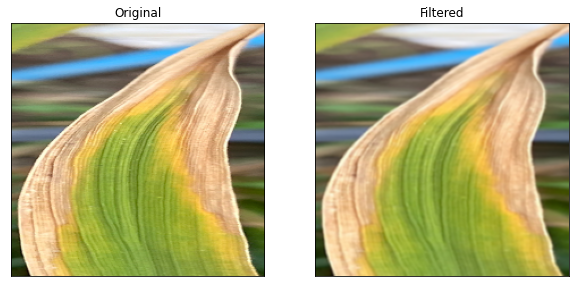

In [32]:
gauss_imgs = img_filter.Gaussian_Blurr((3,3))
plot_before_after(x_train[4], gauss_imgs[4])

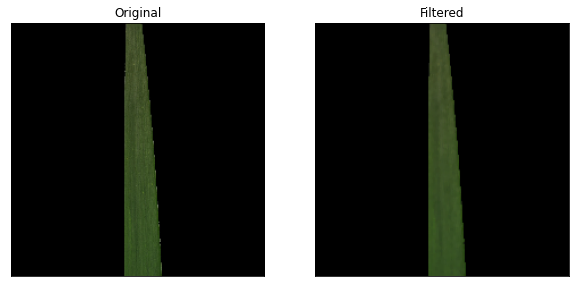

In [33]:
medians = img_filter.Median_Blurr(3)
plot_before_after(x_train[2], medians[2])

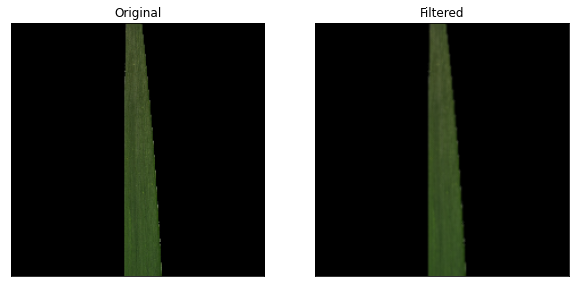

In [34]:
bilateral_imgs = img_filter.Bilateral_Blurr(3, 11, 5)
plot_before_after(x_train[2], bilateral_imgs[2])

## Image Augmentation

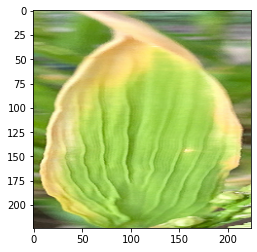

In [35]:
plt.imshow(x_train[0])

In [36]:
x_train[0].shape

(224, 224, 3)

In [37]:
# y_train=y_train.reshape(1070,1)
# y_val=y_val.reshape(230,1)

# # y_train=y_train.reshape(1021,1)
# # y_val=y_val.reshape(171,1)

In [38]:
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [39]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, 
    featurewise_center=False,  # set input mean to 0 over the dataset 
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.2, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [40]:
# prepare an iterators to scale images
train_iterator_1 = train_datagen.flow(x_train, y_train, batch_size=64)
val_iterator_1 = val_datagen.flow(x_val, y_val, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator_1), len(val_iterator_1)))


Batches train=17, test=4


In [41]:

# confirm the scaling works
batchX, batchy = train_iterator_1.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))


Batch shape=(64, 224, 224, 3), min=0.000, max=1.000


# Functions

In [42]:
def learning_curve(model_fit, key='accuracy', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(model_fit.history[key])
    plt.plot(model_fit.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [70]:
def confusion_matrix_plot(matrix, model):
    plt.figure(figsize=(12,10))
    cmap = "YlGnBu"
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=cmap);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);
#     plt.savefig(f'CM_{model}.png', dpi=300)
    plt.show()


In [44]:
def cal_score(model, key):
    
        # evaluate the model
    _, train_acc = model.evaluate(x_train/255.0, y_train, verbose=0)
    _, test_acc = model.evaluate(x_test, y_test, verbose=0)
    _, val_acc = model.evaluate(x_val/255.0, y_val, verbose=0)


    print('Train: %.3f, Test: %.3f, Val: %.3f' % (train_acc, test_acc, val_acc))

    # predict probabilities for test set
    yprobs = model.predict(x_test, verbose=0)
    # predict crisp classes for test set
    yclasses = np.argmax(yprobs,axis=1)


    test_kappa = cohen_kappa_score(y_test, yclasses)
    print('Test Cohens kappa: %f' % test_kappa)
#     val_kappa = cohen_kappa_score(y_val, yclasses)
#     print('Val Cohens kappa: %f' % val_kappa)
    print('\n')
    # confusion matrix
    matrix = confusion_matrix(y_test, yclasses)
    print(matrix)
    print('\n')

    f1 = f1_score(y_test, yclasses, average='weighted')
    print(f'F1 Score: {f1}')
    print('\n')
    
    print(classification_report(y_test, yclasses, target_names=labels))
    
    if key==1:
        confusion_matrix_plot(matrix, model)

# Modelling

### MODEL 1

In [109]:
callbacks = [EarlyStopping(monitor='val_loss', patience=3, verbose=0),
             ModelCheckpoint(filepath='weights/xcep_best1.h5', save_best_only=True)]

In [95]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [96]:
from tensorflow.keras.applications.xception import Xception

In [98]:
base_model = Xception(input_shape = (IMG_SIZE, IMG_SIZE, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

83697664/83683744 [==============================] - 1s 0us/step


In [110]:


# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)
# Add a dropout rate of 0.2
x = Dropout(0.5)(x)                  
# Add a final sigmoid layer for classification
x = Dense(4, activation='softmax')(x)           

xcep_model1 = Model(base_model.input, x) 
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.01)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

xcep_model1.compile(optimizer = optimizer, 
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                   metrics = ['accuracy'])

In [111]:
xcep_model1.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [112]:
xcep_hist = xcep_model1.fit_generator(train_iterator_1,epochs=20,verbose=1,validation_data=val_iterator_1, callbacks = callbacks)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
17/17 [==============================] - 20s 985ms/step - loss: 1.0868 - accuracy: 0.5318 - val_loss: 0.7257 - val_accuracy: 0.7478


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
17/17 [==============================] - 17s 980ms/step - loss: 0.7274 - accuracy: 0.7187 - val_loss: 0.5414 - val_accuracy: 0.8261
Epoch 3/20
17/17 [==============================] - 17s 953ms/step - loss: 0.6152 - accuracy: 0.7607 - val_loss: 0.4374 - val_accuracy: 0.8739
Epoch 4/20
17/17 [==============================] - 17s 972ms/step - loss: 0.5208 - accuracy: 0.8159 - val_loss: 0.3779 - val_accuracy: 0.8957
Epoch 5/20
17/17 [==============================] - 17s 952ms/step - loss: 0.4711 - accuracy: 0.8299 - val_loss: 0.3506 - val_accuracy: 0.8957
Epoch 6/20
17/17 [==============================] - 17s 992ms/step - loss: 0.4485 - accuracy: 0.8374 - val_loss: 0.3522 - val_accuracy: 0.8739
Epoch 7/20
17/17 [==============================] - 17s 958ms/step - loss: 0.3899 - accuracy: 0.8607 - val_loss: 0.3207 - val_accuracy: 0.9000
Epoch 8/20
17/17 [==============================] - 17s 989ms/step - loss: 0.3586 - accuracy: 0.8832 - val_loss: 0.2776 - val_accuracy: 0.9217

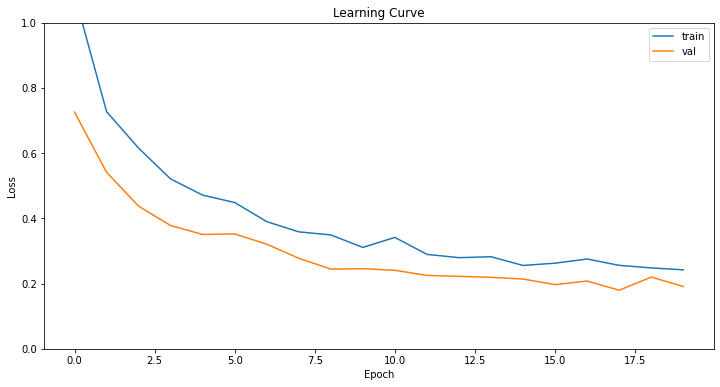

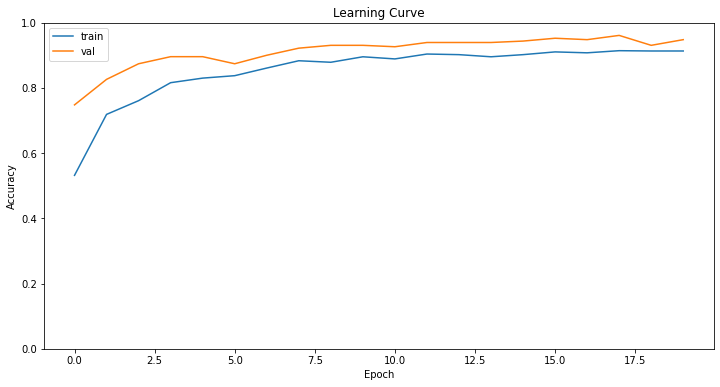

In [113]:
learning_curve(xcep_hist,'loss', ylim=(0,1))
learning_curve(xcep_hist, 'accuracy', ylim=(0,1))

Train: 0.962, Test: 0.939, Val: 0.948
Test Cohens kappa: 0.918122


[[46  0  3  4]
 [ 0 68  0  0]
 [ 2  0 62  0]
 [ 5  0  0 40]]


F1 Score: 0.9389948610748192


              precision    recall  f1-score   support

P_Deficiency       0.87      0.87      0.87        53
     Healthy       1.00      1.00      1.00        68
N_Deficiency       0.95      0.97      0.96        64
K_Deficiency       0.91      0.89      0.90        45

    accuracy                           0.94       230
   macro avg       0.93      0.93      0.93       230
weighted avg       0.94      0.94      0.94       230



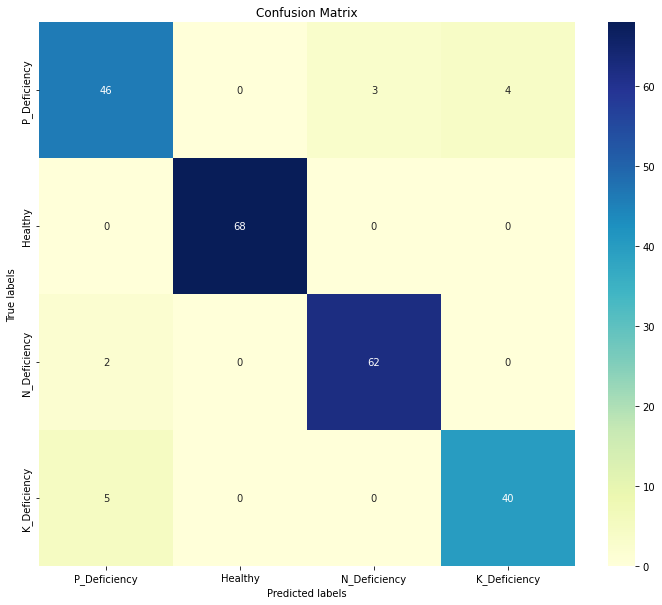

In [114]:
cal_score(xcep_model1, 1)

In [117]:
from tensorflow.keras.models import load_model

best_model1 = load_model('./weights/xcep_best1.h5')

Train: 0.956, Test: 0.935, Val: 0.961
Test Cohens kappa: 0.912296


[[43  0  3  7]
 [ 0 68  0  0]
 [ 1  0 63  0]
 [ 3  0  1 41]]


F1 Score: 0.9339768315792856


              precision    recall  f1-score   support

P_Deficiency       0.91      0.81      0.86        53
     Healthy       1.00      1.00      1.00        68
N_Deficiency       0.94      0.98      0.96        64
K_Deficiency       0.85      0.91      0.88        45

    accuracy                           0.93       230
   macro avg       0.93      0.93      0.93       230
weighted avg       0.94      0.93      0.93       230



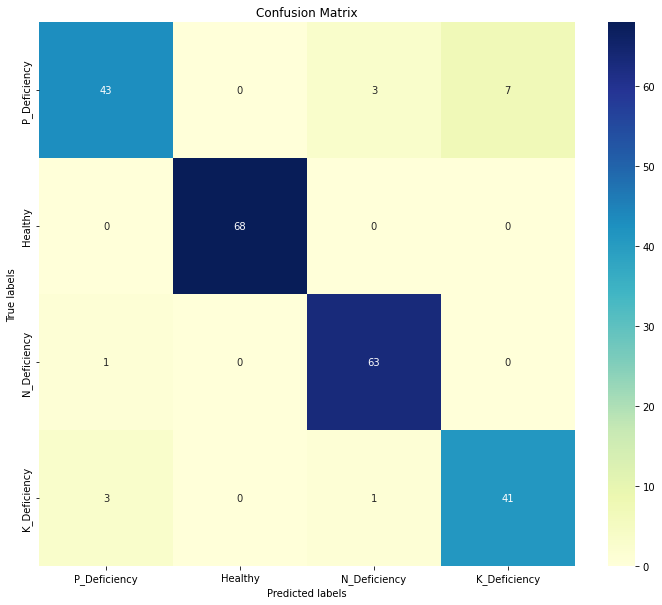

In [118]:
cal_score(best_model1, 1)

In [130]:
xcep_model1.save('best_xcep_93f1_.hdf5')

In [126]:
import os
os.chdir(r'/kaggle/working/')


In [127]:
print(os.getcwd())
print(os.listdir('.'))

/kaggle/working
['best_incv3_95f1.hdf5', '__notebook_source__.ipynb', 'weights', 'CM_<keras.engine.functional.Functional object at 0x7f433dffcdd0>.png', 'best_incv3_96f1.hdf5']
